In [1]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'http://www.kamis.or.kr/service/price/xml.do?action=monthlySalesList'

param = {
    'p_cert_key' : '8dc40ba8-e389-4163-98df-2ea1390c88f6',
    'p_cert_id' : '2455',
    'p_returntype' : 'json',
    'p_yyyy' : '2022',
    'p_period' : '12', # 10~22년 까지 12개년치
    'p_itemcategorycode': '400', # 과일류
    'p_kindcode' : '05', # 후지
    'p_graderank' : '1', # 상급
    'p_countycode' : '1101',  # 디폴트 전체지역
    'p_convert_kg_yn': 'Y',
    'p_itemcode' : '411' # 사과
}
header = {
    'p_cert_key' : '8dc40ba8-e389-4163-98df-2ea1390c88f6',
    'p_cert_id' : '2455'
}
resp = requests.get(url = url, params = param, headers = header)
resp.text


'{"condition":[{"p_cert_id":"2455","p_cert_key":"8dc40ba8-e389-4163-98df-2ea1390c88f6","p_returntype":"json","p_yyyy":"2022","p_period":"12","p_itemcategorycode":"400","p_itemcode":"411","p_kindcode":"05","p_graderank":"1","p_countycode":"1101"}],"error_code":"000","price":[{"productclscode":"02","caption":"도매가격 > 과일류 > 사과 > 후지 > 상품 > 1kg","item":[{"yyyy":"2010","m1":"3,963","m2":"4,137","m3":"4,000","m4":"4,000","m5":"4,000","m6":"4,000","m7":"3,833","m8":"3,703","m9":"3,958","m10":"-","m11":"4,479","m12":"6,435","yearavg":"4,263"},{"yyyy":"2011","m1":"6,175","m2":"6,275","m3":"5,949","m4":"5,381","m5":"6,000","m6":"6,000","m7":"6,000","m8":"6,000","m9":"-","m10":"4,133","m11":"4,473","m12":"5,356","yearavg":"5,712"},{"yyyy":"2012","m1":"5,713","m2":"5,000","m3":"5,600","m4":"5,823","m5":"6,267","m6":"6,830","m7":"7,818","m8":"8,000","m9":"8,000","m10":"-","m11":"4,667","m12":"4,790","yearavg":"6,130"},{"yyyy":"2013","m1":"4,743","m2":"5,316","m3":"5,300","m4":"5,000","m5":"4,714","m6

In [3]:
with open('apple.json', 'w', encoding='utf8') as f:
    f.write(resp.text)
with open('apple.json', 'r') as f:
  apple_json = json.load(f)

In [4]:
kilo = apple_json['price'][0]['item']
df_kilo = pd.DataFrame.from_dict(kilo)
df_kilo.set_index('yyyy')

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,yearavg
yyyy,,,,,,,,,,,,,
2010,"3,963","4,137","4,000","4,000","4,000","4,000","3,833","3,703","3,958",-,"4,479","6,435","4,263"
2011,"6,175","6,275","5,949","5,381","6,000","6,000","6,000","6,000",-,"4,133","4,473","5,356","5,712"
2012,"5,713","5,000","5,600","5,823","6,267","6,830","7,818","8,000","8,000",-,"4,667","4,790","6,130"
2013,"4,743","5,316","5,300","5,000","4,714","4,404","4,415","4,467","4,467",-,"4,587","4,317","4,715"
2014,"6,033","6,067","5,857","5,667","5,853","6,561","6,667","6,490",-,"3,810","3,593","3,533","5,560"
2015,"3,654","3,878","3,942","4,333","4,333","4,333","4,333","4,563",-,-,"3,595","3,586","4,062"
2016,"3,875","4,417","4,500","4,500","4,430","4,129","4,129","4,482",-,"4,000","4,000","4,229","4,259"
2017,"4,460","4,550","4,355","3,970","3,800","3,800","3,838","3,586",-,-,"3,355","3,511","3,919"
2018,"3,977","4,244","4,200","4,200","4,200","4,200","4,200","4,355","4,460","3,850","3,996","4,368","4,184"


In [18]:
df_kilo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   yyyy     13 non-null     object
 1   m1       13 non-null     object
 2   m2       13 non-null     object
 3   m3       13 non-null     object
 4   m4       13 non-null     object
 5   m5       13 non-null     object
 6   m6       13 non-null     object
 7   m7       13 non-null     object
 8   m8       13 non-null     object
 9   m9       13 non-null     object
 10  m10      13 non-null     object
 11  m11      13 non-null     object
 12  m12      13 non-null     object
 13  yearavg  13 non-null     object
dtypes: object(14)
memory usage: 1.5+ KB


In [19]:
df_kilo['yearavg'] = df_kilo['yearavg'].str.replace(',','').astype(int)


In [5]:
carton = apple_json['price'][1]['item']
df_carton = pd.DataFrame.from_dict(carton)
df_carton.set_index('yyyy')

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,yearavg
yyyy,,,,,,,,,,,,,
2010,"16,273","16,958","19,950",-,-,-,-,-,-,-,"14,619","20,000","17,280"
2011,"28,190","29,000","24,391","24,330","24,330","24,130","25,000","25,000",-,"30,000","25,455","24,762","25,472"
2012,"26,750","26,437","30,000","32,479","35,667","40,065","40,000","36,023","35,000",-,"23,816","25,000","31,866"
2013,"24,742","25,521","23,910","23,199","24,859","23,596","25,480","26,908","25,000",-,"18,071","19,450","23,602"
2014,"22,961","25,425","22,498","24,293","24,102","26,589","30,866","31,674",-,"21,690","21,570","19,971","24,888"
2015,"22,527","25,049","25,754","26,033","26,922","26,409","25,854","25,744",-,-,"20,749","20,819","24,647"
2016,"20,268","22,547","22,058","20,509","21,206","21,628","22,408","22,238",-,"13,502","18,085","18,255","20,690"
2017,"20,046","20,315","18,515","18,361","19,081","21,922","23,599","25,292",-,-,"21,288","22,679","21,062"
2018,"22,259","22,421","22,267","20,501","18,795","19,429","20,520","22,148","23,300","21,000","20,600","20,411","20,964"


In [6]:
df_carton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   yyyy     13 non-null     object
 1   m1       13 non-null     object
 2   m2       13 non-null     object
 3   m3       13 non-null     object
 4   m4       13 non-null     object
 5   m5       13 non-null     object
 6   m6       13 non-null     object
 7   m7       13 non-null     object
 8   m8       13 non-null     object
 9   m9       13 non-null     object
 10  m10      13 non-null     object
 11  m11      13 non-null     object
 12  m12      13 non-null     object
 13  yearavg  13 non-null     object
dtypes: object(14)
memory usage: 1.5+ KB


In [7]:
df_carton['yearavg'] = df_carton['yearavg'].str.replace(",","").astype(int)

In [8]:
df_carton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   yyyy     13 non-null     object
 1   m1       13 non-null     object
 2   m2       13 non-null     object
 3   m3       13 non-null     object
 4   m4       13 non-null     object
 5   m5       13 non-null     object
 6   m6       13 non-null     object
 7   m7       13 non-null     object
 8   m8       13 non-null     object
 9   m9       13 non-null     object
 10  m10      13 non-null     object
 11  m11      13 non-null     object
 12  m12      13 non-null     object
 13  yearavg  13 non-null     int64 
dtypes: int64(1), object(13)
memory usage: 1.5+ KB


# 사과, 단위 (ton)
apple =
2009 : 494,491 -> (2010) 460,285톤 - 6.9%
2010 : 460,285 -> (2011) 379,541톤 (-80천톤) - 17.5%
2011 : 379,541 -> (2012) 394,596톤 (15천톤) + 4%
2012 : 394,596 -> (2013) 493,701톤 (99천톤) + 25.1%
2013 : 493,701 -> (2014) 474,712톤 (-19천톤) - 3.8%
2014 : 474,712 -> (2015) 582,846톤 (108천톤) + 22.8%
2015 : 582,846 -> (2016) 576,369톤 (-6천톤) - 1.1%
2016 : 576,369 -> (2017) 545,349톤 -5.4%
2017 : 545,349 -> (2018) 475,303톤 (-70천톤, -12.8%)
2018 : 475,303 -> (2019) 535,324톤 + 12.6%
2019 : 535,324 -> (2020) 422,115톤 (-113,209톤, -21.1%)
2020 : 422,115 -> (2021) 515,930톤 (+93,815톤, +22.2%)]

In [9]:
# 사과, 단위 (ton)
aprod = [494491, 460285, 379541, 394596, 493701, 474712, 582846, 576369, 545349, 475303, 535324, 422115, 515930]
year = [* range(2009, 2022 ,1)]
apple_produced = pd.DataFrame(aprod, index=year, columns=["ton"])

In [10]:
apple_produced

,ton
2009,494491
2010,460285
2011,379541
2012,394596
2013,493701
2014,474712
2015,582846
2016,576369
2017,545349
2018,475303


In [11]:
len(apple_produced)

13

In [12]:
len(df_carton)

13

In [13]:
len(df_kilo)

13

In [14]:
x = [* range(2009, 2022, 1)]

In [15]:
len(x)

13

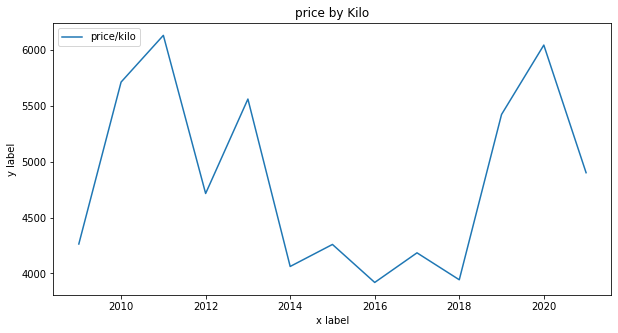

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, df_kilo['yearavg'], label='price/kilo')  # Plot some data on the axes.
# ax.plot(x, apple_produced['ton'])
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("price by Kilo")  # Add a title to the axes.
ax.legend();  # Add a legend.

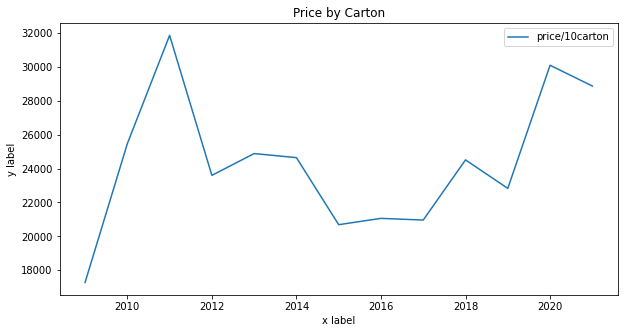

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, df_carton['yearavg'], label='price/10carton')  # Plot more data on the axes...
# ax.plot(x, apple_produced['ton'])
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Price by Carton")  # Add a title to the axes.
ax.legend();  # Add a legend.

No handles with labels found to put in legend.


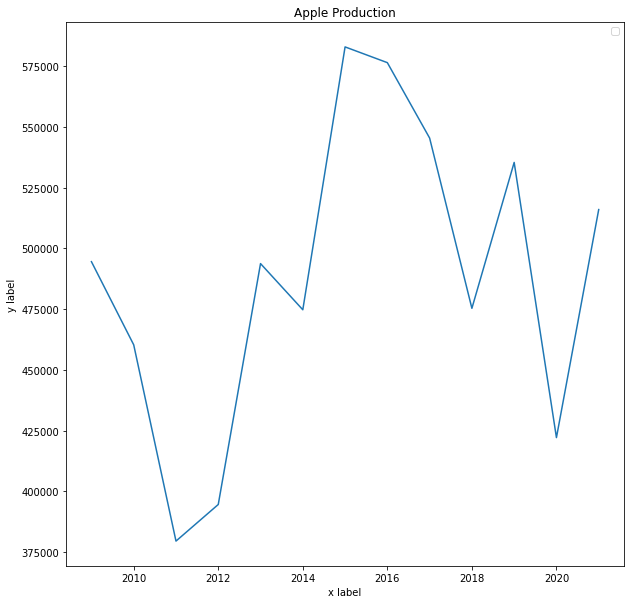

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, apple_produced['ton'])
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Apple Production")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [35]:
df_carton['yearavg'].corr(apple_produced['ton'])

nan

In [42]:
df_carton['yearavg']

0     17280
1     25472
2     31866
3     23602
4     24888
5     24647
6     20690
7     21062
8     20964
9     24515
10    22832
11    30101
12    28876
Name: yearavg, dtype: int64

In [38]:
apple_produced['ton'].corr(df_carton['yearavg'])

nan

In [45]:
s1 = []
s2 = []
s3 = []
for i in df_carton['yearavg']:
    s1.append(i)

for i in df_kilo['yearavg']:
    s2.append(i)
    
for i in apple_produced['ton']:
    s3.append(i)
print(s1, s2, s3)

[17280, 25472, 31866, 23602, 24888, 24647, 20690, 21062, 20964, 24515, 22832, 30101, 28876] [4263, 5712, 6130, 4715, 5560, 4062, 4259, 3919, 4184, 3943, 5422, 6043, 4901] [494491, 460285, 379541, 394596, 493701, 474712, 582846, 576369, 545349, 475303, 535324, 422115, 515930]


In [52]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df_carton['yearavg'], apple_produced['ton'])
corr

-0.6318721686799708

In [53]:
corr, _ = pearsonr(df_carton['yearavg'], df_kilo['yearavg'])
corr

0.7084554473032887

In [54]:
corr, _ = pearsonr(apple_produced['ton'], df_kilo['yearavg'])
corr

-0.5619353972109551